# Лабораторная работа №6. Desicion tree.

Датасет  titanic подаётся на вход обучения Desicion tree. Обучаем подбором гиперпараметров для дерева.\
Убираем не релевантные или не конвертируемые в числа данные из датасета.
Если возраст не известен, берём среднее.

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
import graphviz


data = pd.read_csv('titanic.csv')
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
categorical_cols = ['Sex', 'Embarked']
data = pd.get_dummies(data, columns=categorical_cols)

x = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
clf = DecisionTreeClassifier()

Найдены параметры дерева дающие наивысшую точность

In [26]:
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Best Hyperparameters:", grid_search.best_params_)

Accuracy: 0.7988826815642458
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


Выведем дерево решений в текстовом представлении

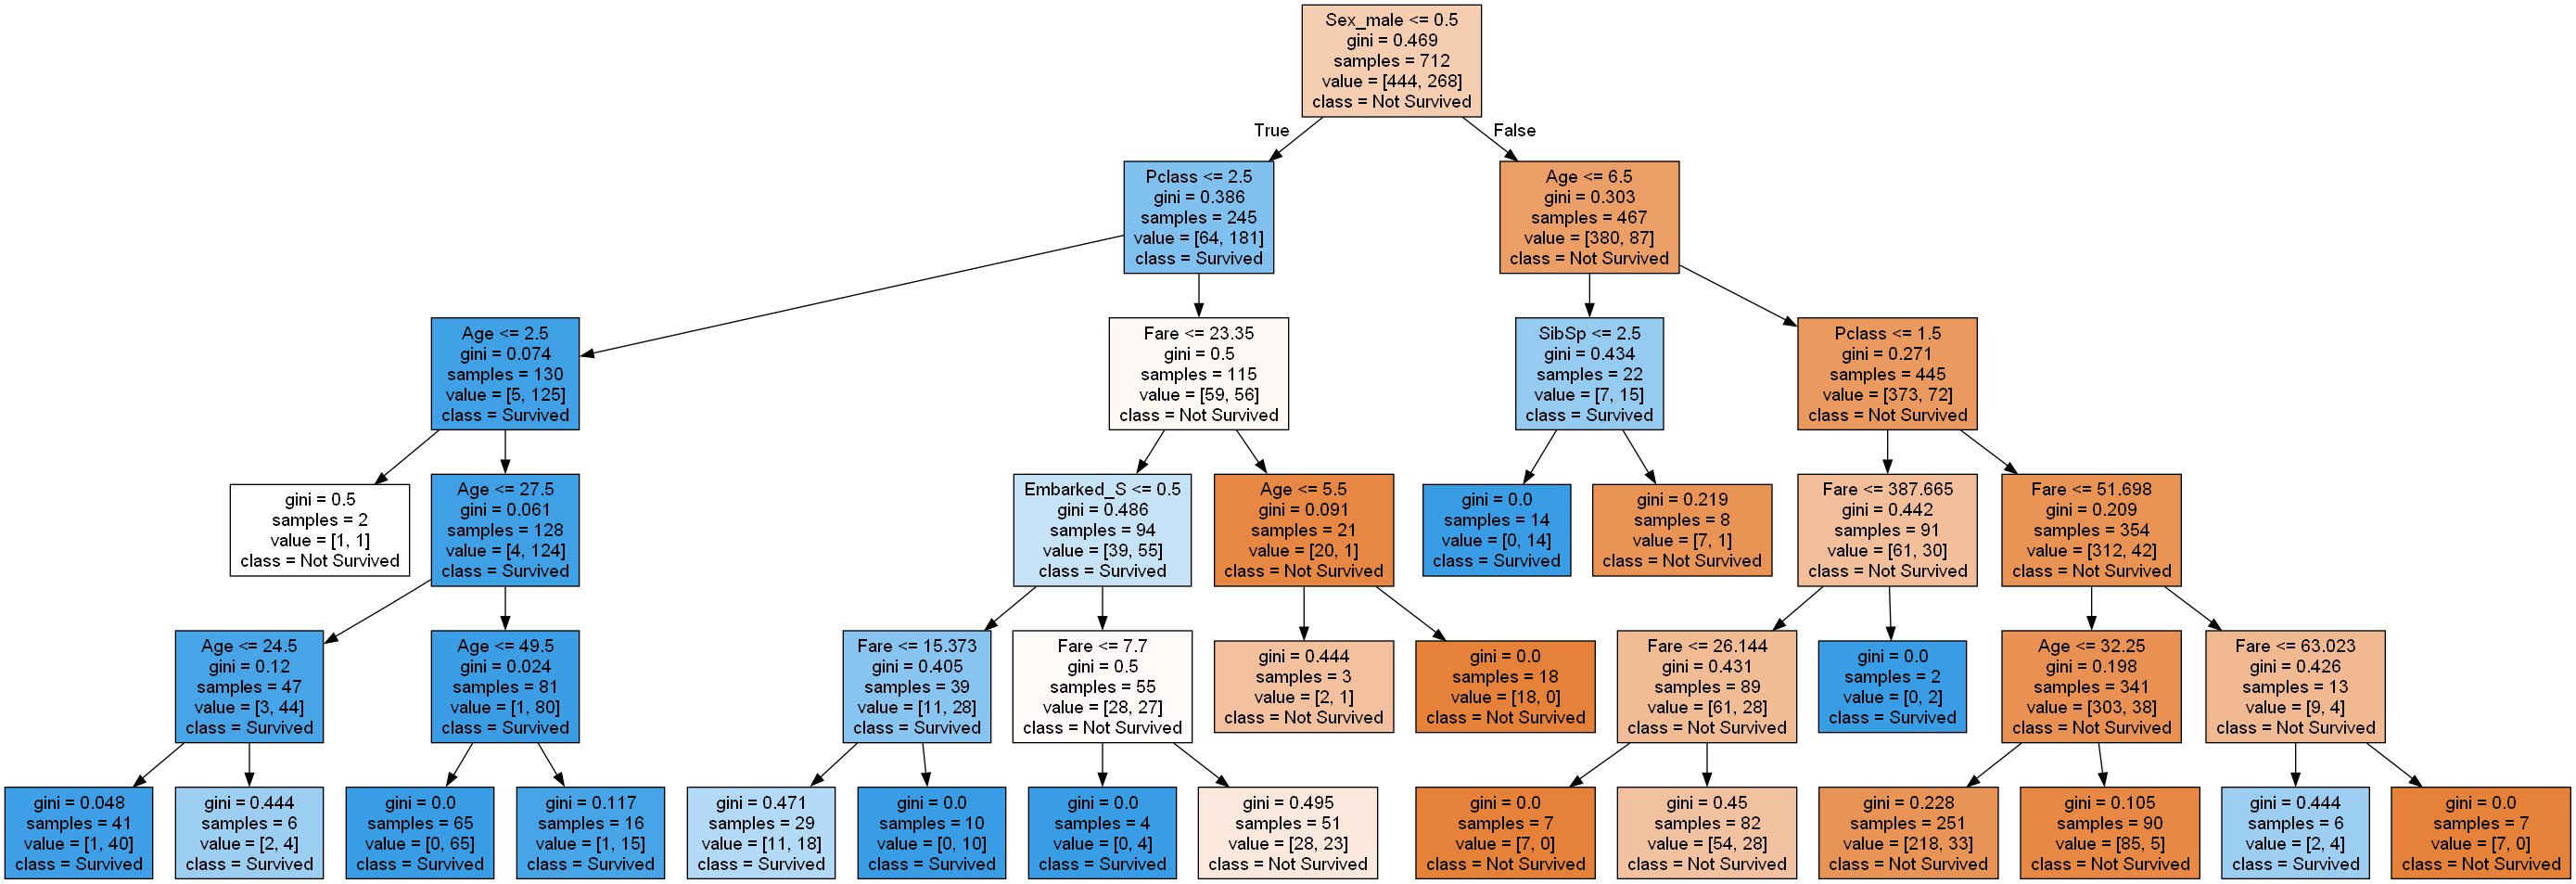

In [42]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
graph = graphviz.Source(dot_data, format='png')
Image(graph.pipe(format='png'))

Найдём факторы, которые влияют больше всего на то, спасётся человек или нет.

In [28]:
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print("Top features for predicting survival:")
print(feature_importances.head())

Top features for predicting survival:
    Feature  Importance
6  Sex_male    0.549733
0    Pclass    0.190163
4      Fare    0.120324
1       Age    0.082912
2     SibSp    0.043684


Результат работы дерева решений приводит нас к результату, что факт влияющий больше всего - пол. У женщины шанс спастись оказывается несколько выше.\
Пространство для интерепретации результатов обширное.

Параметр который влияет значительно меньше - пассажирский класс

In [30]:
survival_rate = data.groupby('Pclass')['Survived'].mean()
print("Survival rate by Pclass:")
print(survival_rate)

Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Пассажир 1-го класса выживет с вероятностью почти в 3 раза больше чем пассажир 3-го класса\
Пространство для интерепретации выросло, но не так значительно.

Интересным остаётся то, что возраст остался фактором, почти не влияющим.